In [6]:
import numpy as np 
import pandas as pd 
import os
from pathlib import Path

for dirname, _, filenames in os.walk('..\machine_learning'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2.16.1
..\machine_learning\fruit_vege\test\apple\Image_1.jpg
..\machine_learning\fruit_vege\test\apple\Image_10.jpg
..\machine_learning\fruit_vege\test\apple\Image_2.jpg
..\machine_learning\fruit_vege\test\apple\Image_3.jpg
..\machine_learning\fruit_vege\test\apple\Image_4.jpg
..\machine_learning\fruit_vege\test\apple\Image_5.jpg
..\machine_learning\fruit_vege\test\apple\Image_6.JPG
..\machine_learning\fruit_vege\test\apple\Image_7.jpg
..\machine_learning\fruit_vege\test\apple\Image_8.jpg
..\machine_learning\fruit_vege\test\apple\Image_9.jpg
..\machine_learning\fruit_vege\test\banana\Image_1.jpg
..\machine_learning\fruit_vege\test\banana\Image_10.jpg
..\machine_learning\fruit_vege\test\banana\Image_2.jpg
..\machine_learning\fruit_vege\test\banana\Image_3.jpg
..\machine_learning\fruit_vege\test\banana\Image_4.jpg
..\machine_learning\fruit_vege\test\banana\Image_5.jpg
..\machine_learning\fruit_vege\test\banana\Image_6.jpg
..\machine_learning\fruit_vege\test\banana\Image_8.jpg
..\machine_

In [7]:
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)



2.16.1


In [11]:
# Create a list with the filepaths for training and testing
train_dir = Path('../machine_learning/fruit_vege/train/')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [12]:
test_dir = Path('../machine_learning/fruit_vege/test/')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [13]:
val_dir = Path('../machine_learning/fruit_vege/validation/')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [37]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("\\")[-2]
            for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df


'apple'

In [30]:
str(train_filepaths[train_filepaths[0]]).split("/")[-2]  

757

In [39]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)


In [40]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

,Filepath,Label
0,..\machine_learning\fruit_vege\train\tomato\Im...,tomato
1,..\machine_learning\fruit_vege\train\banana\Im...,banana
2,..\machine_learning\fruit_vege\train\orange\Im...,orange
3,..\machine_learning\fruit_vege\train\orange\Im...,orange
4,..\machine_learning\fruit_vege\train\pear\Imag...,pear
...,...,...
752,..\machine_learning\fruit_vege\train\grapes\Im...,grapes
753,..\machine_learning\fruit_vege\train\banana\Im...,banana
754,..\machine_learning\fruit_vege\train\apple\Ima...,apple
755,..\machine_learning\fruit_vege\train\carrot\Im...,carrot


In [41]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 757

Number of different labels: 10

Labels: ['tomato' 'banana' 'orange' 'pear' 'grapes' 'carrot' 'spinach' 'cabbage'
 'apple' 'potato']


In [42]:
train_df.head(5)

,Filepath,Label
0,..\machine_learning\fruit_vege\train\tomato\Im...,tomato
1,..\machine_learning\fruit_vege\train\banana\Im...,banana
2,..\machine_learning\fruit_vege\train\orange\Im...,orange
3,..\machine_learning\fruit_vege\train\orange\Im...,orange
4,..\machine_learning\fruit_vege\train\pear\Imag...,pear


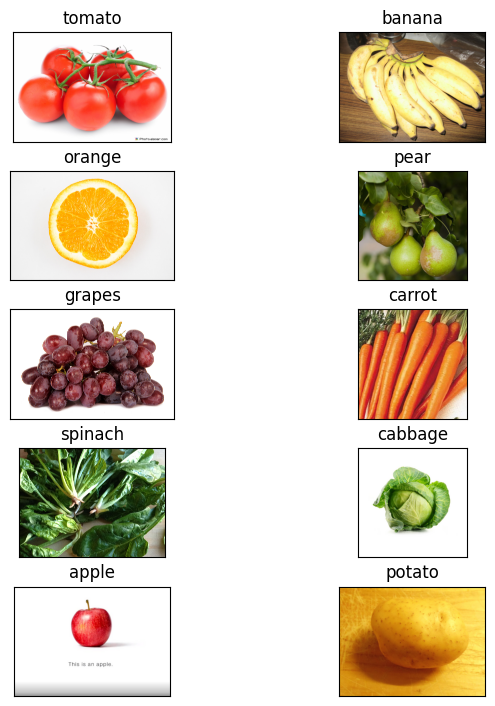

In [46]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [47]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [48]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 757 validated image filenames belonging to 10 classes.


In [49]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 93 validated image filenames belonging to 10 classes.


In [50]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 93 validated image filenames belonging to 10 classes.


In [51]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [53]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10


c:\Users\krant\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.5540 - loss: 1.5268 - val_accuracy: 0.9355 - val_loss: 0.1926
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9634 - loss: 0.1508 - val_accuracy: 0.9355 - val_loss: 0.2186
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9968 - loss: 0.0368 - val_accuracy: 0.9355 - val_loss: 0.1720
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9973 - loss: 0.0270 - val_accuracy: 0.9355 - val_loss: 0.1783
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9997 - loss: 0.0109 - val_accuracy: 0.9355 - val_loss: 0.1856


In [54]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step


['tomato',
 'orange',
 'spinach',
 'carrot',
 'potato',
 'tomato',
 'apple',
 'cabbage',
 'spinach',
 'pear',
 'tomato',
 'carrot',
 'tomato',
 'orange',
 'cabbage',
 'potato',
 'pear',
 'grapes',
 'orange',
 'carrot',
 'orange',
 'pear',
 'pear',
 'tomato',
 'apple',
 'carrot',
 'banana',
 'tomato',
 'carrot',
 'carrot',
 'grapes',
 'pear',
 'banana',
 'tomato',
 'apple',
 'tomato',
 'carrot',
 'cabbage',
 'potato',
 'spinach',
 'cabbage',
 'cabbage',
 'potato',
 'cabbage',
 'grapes',
 'potato',
 'spinach',
 'spinach',
 'cabbage',
 'spinach',
 'banana',
 'grapes',
 'pear',
 'grapes',
 'spinach',
 'spinach',
 'pear',
 'carrot',
 'potato',
 'banana',
 'tomato',
 'orange',
 'pear',
 'pear',
 'tomato',
 'apple',
 'banana',
 'spinach',
 'potato',
 'grapes',
 'pear',
 'spinach',
 'apple',
 'apple',
 'carrot',
 'cabbage',
 'cabbage',
 'grapes',
 'pear',
 'banana',
 'carrot',
 'grapes',
 'pear',
 'apple',
 'apple',
 'orange',
 'banana',
 'pear',
 'orange',
 'potato',
 'pear',
 'cabbage',
 'gr

In [55]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'tomato'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
orange


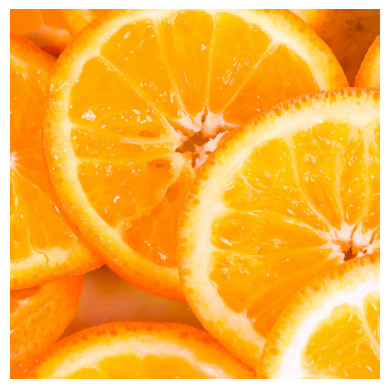

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = output('..\machine_learning\\fruit_vege\\test\\orange\Image_5.jpg')
print(img)
# Path to your image file
image_path ='..\machine_learning\\fruit_vege\\test\\orange\Image_5.jpg'
# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
model.save('FV.h5')





In [ ]:
#